In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
cancer = load_breast_cancer() #딕셔너리형태

In [10]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, stratify = cancer.target)

In [11]:
lr = LogisticRegression(max_iter=5000)

In [12]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [13]:
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

In [15]:
print(train_score)
print(test_score)

0.9671361502347418
0.9370629370629371


In [16]:
lr100 = LogisticRegression(C=100, max_iter=500) #C값이 커지면 규제가 작아진다. C는 역수의 관계에 있음

In [17]:
lr100.fit(x_train, y_train)

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, max_iter=500)

In [19]:
train_score100 = lr100.score(x_train, y_train)
test_score100 = lr100.score(x_test, y_test)

In [21]:
print(train_score100)
print(test_score100)

0.9765258215962441
0.9440559440559441


In [22]:
lr001 = LogisticRegression(C=0.01, max_iter=5000)
lr001.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=5000)

In [23]:
train_score001 = lr001.score(x_train, y_train)
test_score001 = lr001.score(x_test, y_test)

In [24]:
print(train_score001)
print(test_score001)

0.9553990610328639
0.951048951048951


In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family="Malgun Gothic") #한글인코딩
plt.rcParams['axes.unicode_minus'] = False

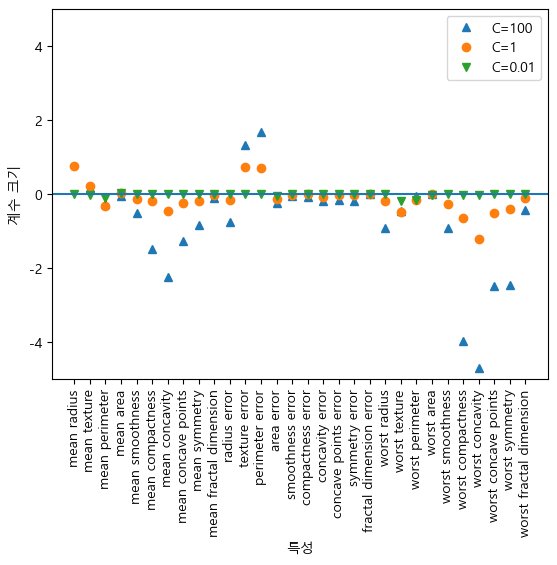

In [28]:
plt.plot(lr100.coef_.T, '^', label = 'C=100')
plt.plot(lr.coef_.T, 'o', label = 'C=1')
plt.plot(lr001.coef_.T, 'v', label = 'C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()
#plt.grid()
plt.show()

C=0.01인 l1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.01인 l1 로지스틱 회귀의 테스트 정확도: 0.91
C=1.00인 l1 로지스틱 회귀의 훈련 정확도: 0.97
C=1.00인 l1 로지스틱 회귀의 테스트 정확도: 0.94
C=100.00인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.00인 l1 로지스틱 회귀의 테스트 정확도: 0.94


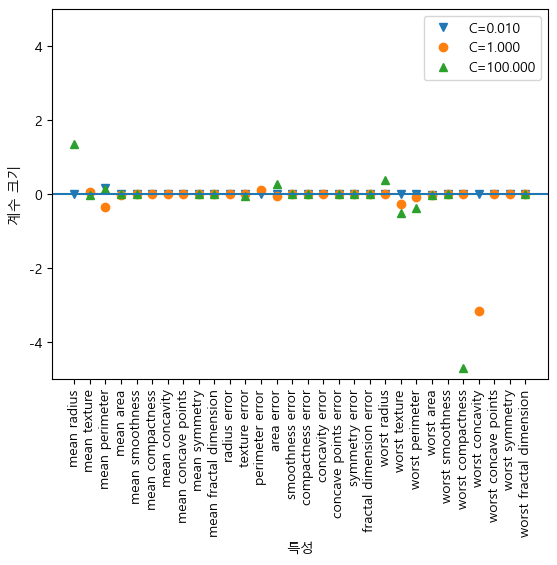

In [37]:
for C, marker in zip([0.01, 1, 100], ['v','o','^']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(x_train, y_train)
    print('C={:.2f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}'.format(C, lr_l1.score(x_train, y_train)))
    print('C={:.2f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}'.format(C, lr_l1.score(x_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1]) #지정한 점을 따라 수평선을 표시
plt.xlim(xlims) #x축의 범위
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.ylim(-5,5) #y축의 범위
plt.legend()
plt.show()